In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras import optimizers

In [6]:
classifier = Sequential()

# Please note the following code follows the architecure of VGG16 model;
# however, in instead of 224*224 RGB images in traditional VGG16, the model
# has been fed with 64*64 HSV color space images
classifier.add(Conv2D(input_shape=(64,64,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
classifier.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
classifier.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
classifier.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
classifier.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
classifier.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=4096,activation="relu"))
classifier.add(Dense(units=4096,activation="relu"))
classifier.add(Dense(units=25, activation="softmax"))

#Compiling The Designed VGG16 Model, learning rate = 0.00001
classifier.compile(
              optimizer = optimizers.Adam(learning_rate= 0.00001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
#Part 2 Fittting the model to the dataset
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'D:\T431 - George Brown\DL2\Final Project\data\training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

validation_set = test_datagen.flow_from_directory(
        r'D:\T431 - George Brown\DL2\Final Project\data\validation_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 7837 images belonging to 25 classes.
Found 2240 images belonging to 25 classes.


In [8]:
# Defining callabcks
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Handgesture_Final_VGG.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

model = classifier.fit(
        training_set,
        steps_per_epoch=245,
        epochs=60,
        verbose=1,
        validation_data= validation_set,
        validation_steps=48)

print(classifier.summary())
classifier.save(r'D:\T431 - George Brown\DL2\Final Project\Handgesture_Final_VGG.h5')

Epoch 1/60
245/245 [==============================] - 54s 210ms/step - loss: 2.0088 - accuracy: 0.4364 - val_loss: 1.2808 - val_accuracy: 0.6087
Epoch 2/60
245/245 [==============================] - 17s 68ms/step - loss: 0.5380 - accuracy: 0.8469 - val_loss: 0.5909 - val_accuracy: 0.8184
Epoch 3/60
245/245 [==============================] - 17s 70ms/step - loss: 0.2233 - accuracy: 0.9301 - val_loss: 0.5094 - val_accuracy: 0.8665
Epoch 4/60
245/245 [==============================] - 17s 70ms/step - loss: 0.1415 - accuracy: 0.9578 - val_loss: 0.9393 - val_accuracy: 0.7760
Epoch 5/60
245/245 [==============================] - 16s 65ms/step - loss: 0.1087 - accuracy: 0.9668 - val_loss: 0.4304 - val_accuracy: 0.8691
Epoch 6/60
245/245 [==============================] - 16s 65ms/step - loss: 0.0745 - accuracy: 0.9782 - val_loss: 0.4718 - val_accuracy: 0.8613
Epoch 7/60
245/245 [==============================] - 17s 68ms/step - loss: 0.0558 - accuracy: 0.9853 - val_loss: 0.3970 - val_accuracy

In [9]:
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                  

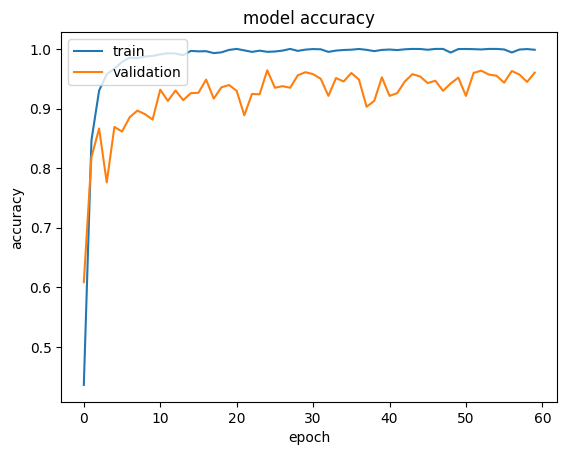

In [10]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['accuracy'], label = "Train accuarcy")
plt.plot(model.history['val_accuracy'],label = "Val accuarcy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

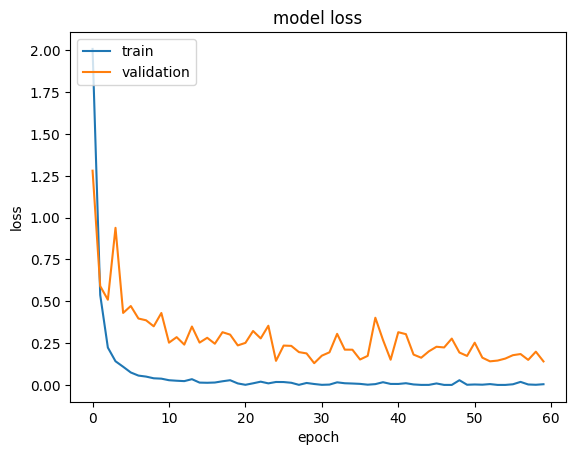

In [11]:
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# "Accuracy from test sets"
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        r'D:\T431 - George Brown\DL2\Final Project\data\test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
loss,accuracy = classifier.evaluate_generator(test_set, steps=34)
print("Testing accuracy:",accuracy)

Found 1119 images belonging to 25 classes.


C:\Users\pinku\AppData\Local\Temp\ipykernel_69700\1371589770.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy = classifier.evaluate_generator(test_set, steps=34)


Testing accuracy: 0.8832720518112183
